In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from lang_sam import LangSAM
import torch
from torchvision.utils import draw_bounding_boxes
from torchvision.utils import draw_segmentation_masks


model = LangSAM()

/home/changst/miniconda3/envs/lsa/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/changst/miniconda3/envs/lsa/lib/python3.9/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/changst/miniconda3/envs/lsa/lib/python3.9/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/changst/miniconda3/envs/lsa/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Trigger

final text_encoder_type: bert-base-uncased
Model loaded from /home/changst/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


/home/changst/miniconda3/envs/lsa/lib/python3.9/site-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/changst/miniconda3/envs/lsa/lib/python3.9/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/changst/miniconda3/envs/lsa/lib/python3.9/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


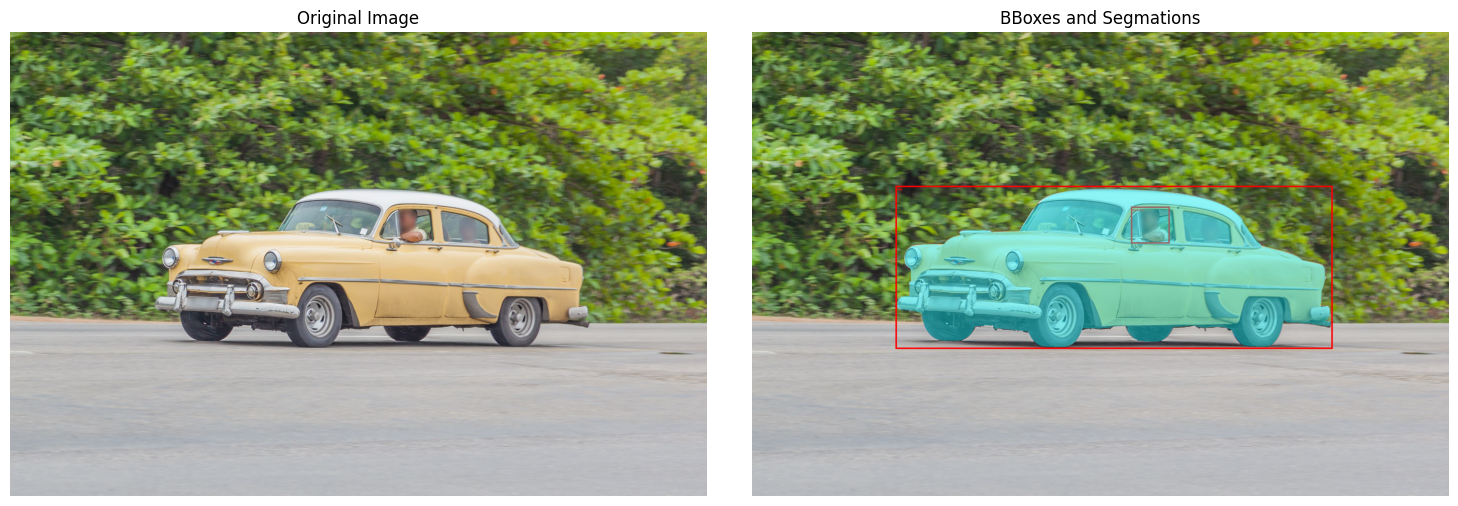

In [2]:
image_pil = Image.open("./assets/car.jpeg").convert("RGB")
text_prompt = "driver in a car"
masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

def draw_image(image, masks, boxes, labels, alpha=0.4):
    image = torch.from_numpy(image).permute(2, 0, 1)
    if len(boxes) > 0:
        image = draw_bounding_boxes(image, boxes, colors=['red'] * len(boxes), labels=labels, width=5)
    if len(masks) > 0:
        image = draw_segmentation_masks(image, masks=masks, colors=['cyan'] * len(masks), alpha=alpha)
    return image.numpy().transpose(1, 2, 0)

# Draw the image with bounding boxes and masks
image_with_boxes = draw_image(np.array(image_pil), masks, boxes, phrases)


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image_pil)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(image_with_boxes)
axes[1].set_title("BBoxes and Segmations")
axes[1].axis('off')
plt.tight_layout()
plt.show()
